In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
import seaborn as sns

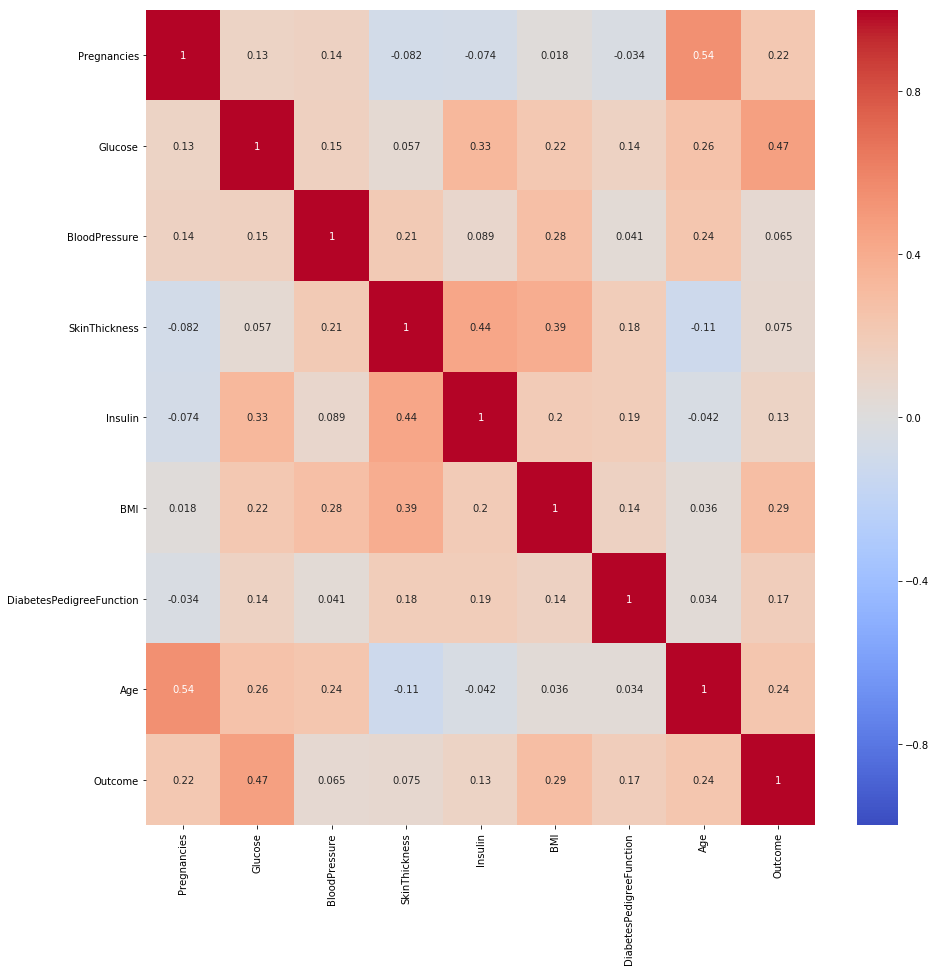

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm',vmin = -1)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
len(data.loc[data['Glucose']==0])

5

In [9]:
len(data.loc[data['BloodPressure']==0])

35

In [10]:
len(data.loc[data['SkinThickness']==0])

227

In [11]:
len(data.loc[data['Insulin']==0])

374

In [12]:
len(data.loc[data['BMI']==0])

11

In [13]:
len(data.loc[data['DiabetesPedigreeFunction']==0])

0

In [14]:
len(data.loc[data['Age']==0])

0

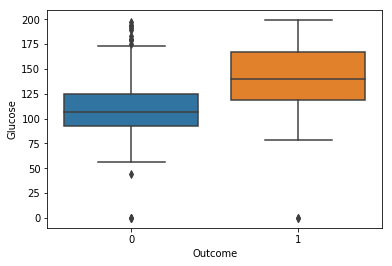

In [15]:
sns.boxplot(y = data['Glucose'],x =  data['Outcome'])

In [16]:
data.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [17]:
def imputeglucose(column):
    outcome = column[0]
    glucose = column[1]
    if glucose == 0:
        if outcome == 0:
            return 109
        else:
            return 141
    else:
        return glucose
    

In [18]:
data['Glucose'] = data[['Outcome','Glucose']].apply(imputeglucose,axis=1)

In [19]:
len(data.loc[data['Glucose']==0])

0

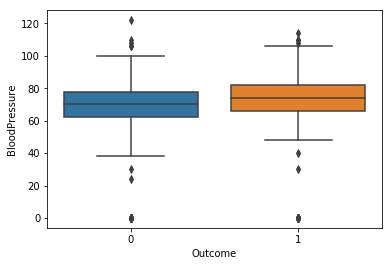

In [20]:
sns.boxplot(y = data['BloodPressure'],x =  data['Outcome'])

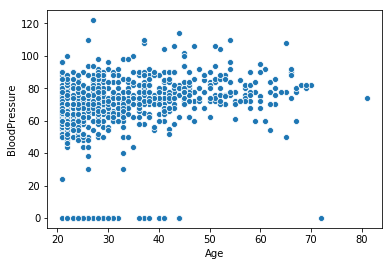

In [21]:
sns.scatterplot(y = data['BloodPressure'],x =  data['Age'])

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x1 = data[['Age']]
y1 = data[['BloodPressure']]
modelx = LinearRegression()

In [24]:
modelx.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
def imputebp(column):
    age = column[0]
    bp  = column[1]
    if bp ==0:
        return modelx.predict([[age]])
    else:
        return bp

In [26]:
data['BloodPressure'] = data[['Age','BloodPressure']].apply(imputebp,axis=1)

In [27]:
len(data.loc[data['BloodPressure']==0])

0

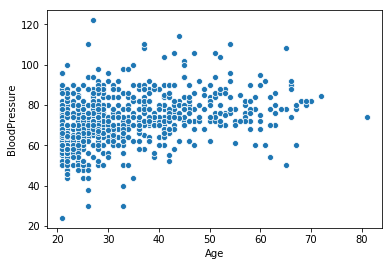

In [28]:
sns.scatterplot(y = data['BloodPressure'],x =  data['Age'])

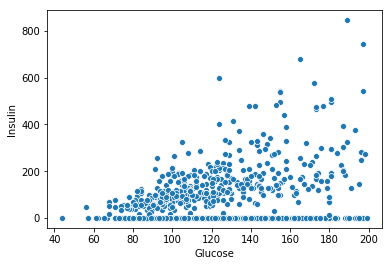

In [29]:
sns.scatterplot(y = data['Insulin'],x =  data['Glucose'])

In [30]:
import numpy as np
data1 = data[['Glucose','Insulin']].replace(0,np.NaN)

In [31]:
data1.head()

,Glucose,Insulin
0,148,NaN
1,85,NaN
2,183,NaN
3,89,94.0
4,137,168.0


In [32]:
data1 = data1.dropna()

In [33]:
data1.head()

,Glucose,Insulin
3,89,94.0
4,137,168.0
6,78,88.0
8,197,543.0
13,189,846.0


In [34]:
x2 = data1[['Glucose']]
y2 = data1[['Insulin']]
modely = LinearRegression()

In [35]:
modely.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
def imputeinsulin(column):
    glucose = column[0]
    insulin  = column[1]
    if insulin == 0:
        return int(modely.predict([[glucose]]))
    else:
        return insulin

In [37]:
data['Insulin'] = data[['Glucose','Insulin']].apply(imputeinsulin,axis=1)

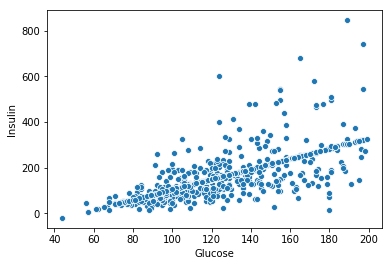

In [38]:
sns.scatterplot(y = data['Insulin'],x =  data['Glucose'])

In [39]:
from sklearn.preprocessing import Imputer

In [40]:
imp = Imputer(missing_values = 0,strategy = 'mean')

C:\Users\satya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
data['SkinThickness'] = imp.fit_transform(data[['SkinThickness']])

In [42]:
data['BMI'] = imp.fit_transform(data[['BMI']])

In [43]:
len(data.loc[data['Glucose']==0])

0

In [44]:
len(data.loc[data['SkinThickness']==0])

0

In [45]:
len(data.loc[data['BMI']==0])

0

In [46]:
len(data.loc[data['Insulin']==0])

0

In [47]:
len(data.loc[data['BloodPressure']==0])

0

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = data.drop(['Outcome'],axis = 1)

In [50]:
y = data['Outcome']

In [51]:
x_train,x_test,y_train,y_test  = train_test_split(x,y)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model = RandomForestClassifier(min_samples_split = 10,random_state = 50,max_depth  = 10)

In [54]:
model.fit(x_train,y_train)

C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [55]:
model.score(x_train,y_train)

0.9114583333333334

In [56]:
model.score(x_test,y_test)

0.7916666666666666

In [57]:
n_estimators = [50,100,150,200,250]
max_depth = [2,4,6,8,10,12,14]
min_samples_split = [2,4,6,8,10,12,14,16]
min_samples_leaf = [2,4,6,8,10,12,14,16]

In [58]:
rand_grid = {'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
ran_clf = RandomizedSearchCV(param_distributions = rand_grid,estimator = model,verbose = 1,n_iter = 100,cv=10,n_jobs = -1)

In [61]:
ran_clf.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   56.9s finished
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=10,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [62]:
ran_clf.best_params_

{'n_estimators': 150,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [86]:
new_model = RandomForestClassifier(min_samples_split = 6,max_depth  = 10,min_samples_leaf = 2,n_estimators = 150 )

In [87]:
new_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
new_model.score(x_train,y_train)

0.9652777777777778

In [89]:
new_model.score(x_test,y_test)

0.7760416666666666

# 77% accuracy

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
model.score(x_test,y_test)

0.7916666666666666

# outperformed

In [69]:
model.score(x_train,y_train)

0.9114583333333334

In [70]:
y_pred = model.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred)

0.7916666666666666

In [72]:
model1 = GradientBoostingClassifier()

In [73]:
model1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
model1.score(x_train,y_train)

0.9357638888888888

In [75]:
model1.score(x_test,y_test)

0.7864583333333334

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model2 = DecisionTreeClassifier(min_samples_split = 8)

In [78]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
model2.score(x_train,y_train)

0.9444444444444444

In [80]:
model2.score(x_test,y_test)

0.7604166666666666

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model3 = KNeighborsClassifier()

In [83]:
model3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
model3.score(x_train,y_train)

0.8194444444444444

In [85]:
model3.score(x_test,y_test)

0.7291666666666666

# GRADIENT BOOSTER and RANDOM FOREST seems to be our best classifier by further feature scaling and good imputation and hyper parameter optimization,we can improve the accuracy easily upto >=85%                                                                                THANK YOU!!!